## Exercise 2
* **Dataset:** [`Red wine`](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* **Model to use:** [`Random Forest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* **Model evaluation:** [`ROC curve`](https://intellipaat.com/blog/roc-curve-in-machine-learning/)

Give a try to `Random Forest` with the `Red Wine` dataset!

This time, after using the classification report, also check the [ROC curve](https://intellipaat.com/blog/roc-curve-in-machine-learning/).

In [209]:
# Add your code here...
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



path = r'E:\Be.code\Machine_learning\additional_resources\datasets\Wine Quality\wine.csv'
df = pd.read_csv(path)
df.head()










,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [210]:
df.shape

(6497, 13)

In [211]:
#iris_df.describe()
X= df.iloc[:, 1:]
y= df.iloc[:, -1]

#print(y)
print(y.unique())

[5 6 7 4 8 3 9]


In [212]:
print(df.isnull().sum())

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [213]:
#SPlitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 80% training and 30% test

In [214]:
y_train.unique()

array([5, 7, 6, 4, 8, 3, 9], dtype=int64)

In [215]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4547, 12)
(4547,)
(1950, 12)
(1950,)


In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=4547, n_features=12, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [217]:
from sklearn.preprocessing import label_binarize
yy = label_binarize(y_test, classes=[0,1,2,3,4,5,6])
rf_pr = label_binarize(rf_predict, classes=[0,1,2,3,4,5,6])

In [218]:
#confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   0  11   0   0   0]
 [  0   1  54   2   0   0]
 [  0   0 646   0   0   0]
 [  0   0   0 868   0   0]
 [  0   0   0  83 227   0]
 [  0   0   0  15  43   0]]
89.33333333333333


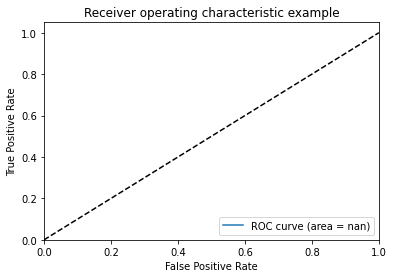

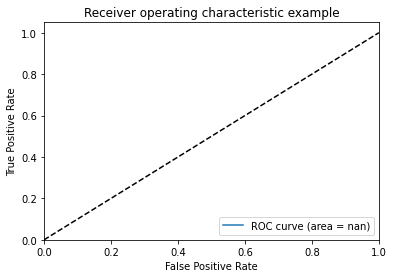

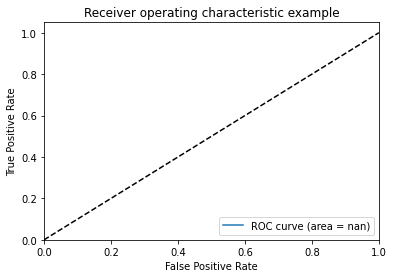

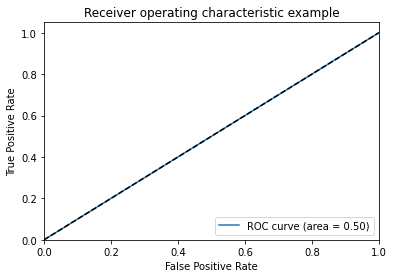

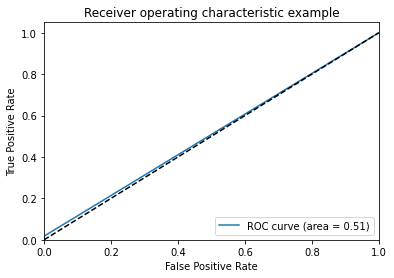

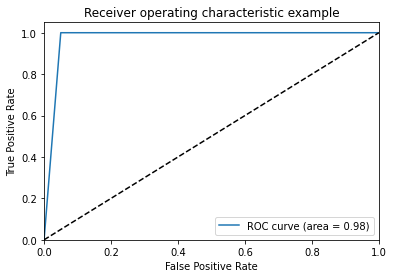

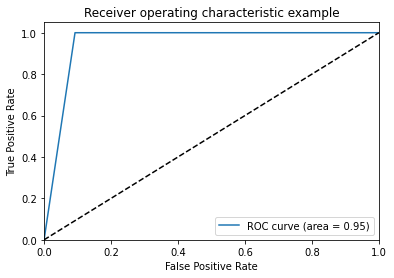

In [219]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
n_classes = 7
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yy[:, i], rf_pr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [220]:
# Classification Report on train data set
from sklearn.metrics import classification_report

y_pred_train=rf.predict(X_train)
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))

Classification Report on Train Data 

               precision    recall  f1-score   support

           3       0.00      0.00      0.00        19
           4       1.00      0.11      0.19       159
           5       0.91      1.00      0.95      1492
           6       0.89      1.00      0.94      1968
           7       0.85      0.75      0.79       769
           8       0.00      0.00      0.00       135
           9       0.00      0.00      0.00         5

    accuracy                           0.89      4547
   macro avg       0.52      0.41      0.41      4547
weighted avg       0.86      0.89      0.86      4547

